# 1. Hierarchical Clustering
We are now going to talk about a different technique for building clustering known as: **Agglomerative Clustering**. If you have ever studied algorithms, you will recognize this as a greedy algorithm. We are going to be purposefully short sighted, and make what appears to be the best decision at the time.

The basic idea looks something like this:
> * **Start with a set of points**
* **Merge the 2 closest**
* **Repeat until you only have 1 group of all the points**

## 1.1 Agglomerative Clustering 

An awesome video to help explain this can be seen <a href="https://www.youtube.com/watch?v=XJ3194AmH40">here</a>.

In order to work with the outcome of agglomerative clustering, we can use what is referred to as a **dendrogram**. In a dendrogram, the height of a cluster *(A,B)* is proportional to the height of the line that joins $A$ and $B$. 

## 1.2 How to calculate distance?
So far, we have assumed that we are using **Euclidean Distance** are our measure of the closeness of the clusters. However, this does not need to be the case. There are other methods that can be used as well, seen <a href="https://numerics.mathdotnet.com/distance.html">here</a>. Note, there are certain things that make a distance valid, which are discussed more <a href="https://en.wikipedia.org/wiki/Metric_(mathematics)">here</a>.

## 1.3 How do we join clusters together?
Since we did have not gone too in depth regarding hierarchical clustering, we still don't fully know how to define the distance between 2 clusters. We have several options:

> * **The mean distance between two clusters**
* **The distance between the 2 closest cluster points**
* **The distance between the 2 furthest cluster points**

<img src="images/linkages.jpg">

### 1.3.1 Single-Linkage
This is where we look at each point in cluster 1, and find the closest point in cluster 2. This looks like:
> `d(clusterA, clusterB) = min distance between any 2 points, 1 from A, 1 from B`

The pseudocode may look something like this:

**Pseudocode**<br>
```
min_dist = Infinity
for p1 in cluster1:
    for p2 in cluster2:
        min_dist = min( d(p1, p2), min_dist)
```

A down side to this method is that we may get something called **the chaining effect**. This is where we just keep choosing the thing beside our current cluster. However, we end up choosing something where the total points end up very far apart. 

### 1.3.2 Complete-Linkage
The opposite of single linkage clustering is **complete linkage clustering**. This is where we look at each point in cluster 1, and find the furthest point in cluster 2. This looks like:

> `d(clusterA, clusterB) = max distance between any 2 points, 1 from A, 1 from B`

The pseudocode may look something like this:

**Pseudocode**<br>
```
max_dist = Infinity
for p1 in cluster1:
    for p2 in cluster2:
        min_dist = max( d(p1, p2), max_dist)
```

### 1.3.3 Mean Distance
The third type of clustering, which is probably the most intuitive, is to just take the mean distance. 

**Pseudocode**<br>
```
dist = 0
for p1 in cluster1:
    for p2 in cluster2:
        dist += d(p1, p2)
    dist = dist / (len(cluster1)*len(cluster2))
```

# 2. Hierarchical Clustering in Code
We are now going to look at hierarchical clustering in code. We won't be writing the code ourselves, but instead will be using a library and exploring what it can do. 

/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Z shape (899, 4)


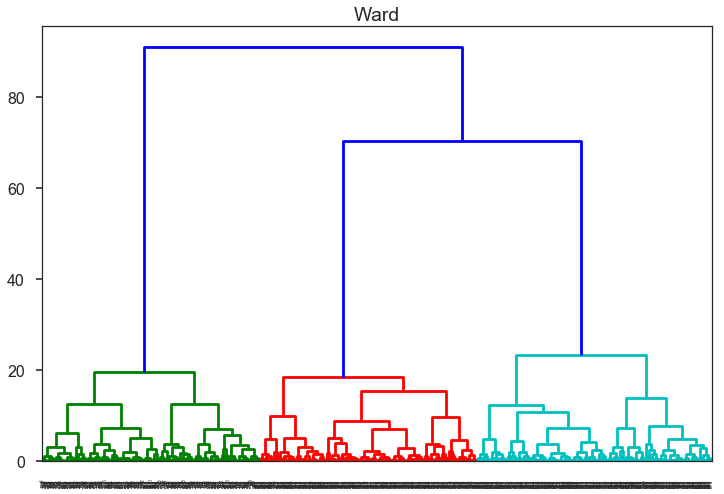

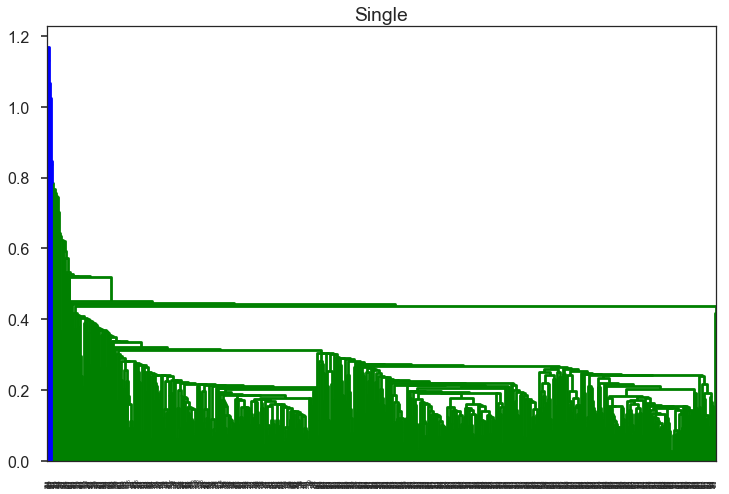

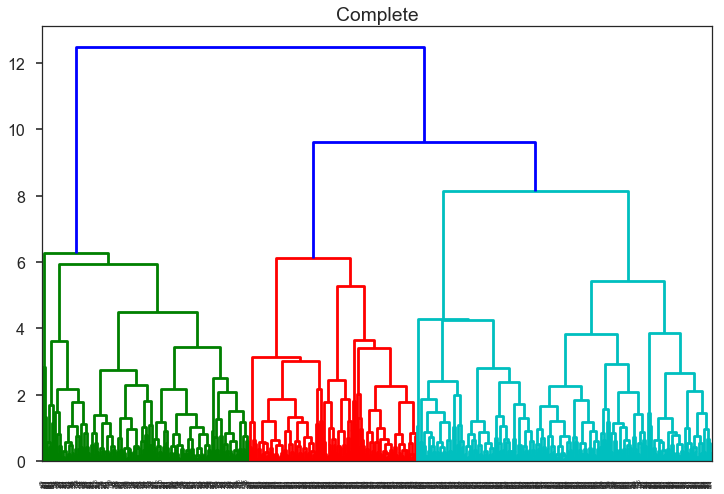

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn Plot Styling
sns.set(style="white", palette="husl")
sns.set_context("poster")
sns.set_style("ticks")

%matplotlib inline

# New imports, specific to this example
from scipy.cluster.hierarchy import dendrogram, linkage

def main():
  D = 2                     # Dimensionality
  s = 4                     # Separation so we can control how far apart the means are
  mu1 = np.array([0, 0])
  mu2 = np.array([s, s])
  mu3 = np.array([0, s])
  
  N = 900                   # Number of samples
  X = np.zeros((N, D))
  X[:300, :] = np.random.randn(300, D) + mu1
  X[300:600, :] = np.random.randn(300, D) + mu2
  X[600:, :] = np.random.randn(300, D) + mu3
  
  # Call linkage on X, pass in parameter telling what type of linkage to use
  Z = linkage(X, 'ward')
  # In general, Z will have format index1, index2 for two index's in X that represent the 
  # points that are joined at that moment. The third column will be the distance, which is 
  # how far apart the two clusters were before being joined, and the 4th column will be 
  # sample count, which is the number of points in that cluster. Hence, the size of Z will
  # be ((N - 1) x 4)
  print("Z shape", Z.shape)
  
  fig, ax = plt.subplots(figsize=(12,8))
  plt.title("Ward")
  dendrogram(Z)      # Call dendrogram on Z
  plt.show()
  
  # Now do single linkage for a different example
  fig, ax = plt.subplots(figsize=(12,8))
  Z = linkage(X, 'single')
  plt.title("Single")
  dendrogram(Z)
  plt.show()
  
  # And one more for complete
  fig, ax = plt.subplots(figsize=(12,8))
  Z = linkage(X, 'complete')
  plt.title("Complete")
  dendrogram(Z)
  plt.show()
  
  
if __name__ == '__main__':
  main()

We can clearly see that there are 3 natural clusters occuring! We have the chaining effect happening in the **single linkage** scenario. Clearly, **ward linkage** was the most effective. 

---

<br>
# 3. Hierarchical Clustering: Evolution 
We are now going to apply heirarchical clustering to biological data, specifically DNA sequences. Our goal here is to **simulate evolution**. It is known that one of the key ideas behind evolution is **random mutations**. Random mutations which are beneficial tend to be propagated forward, and those which are detrimental tend to be weeded out of the gene pool. However, are are not interested in the *fitness* of any particular mutation, we just want to see what happens if we try to build a tree out of the DNA. 

### 3.1 Simplifying Assumptions
In order to do this we will need to make some simplifying assumptions. 
1. We will not be working with any individual organism's real DNA sequence, since that can be billions of characters long. That would require a ton of time, without adding any real benefit to this example. So, we will be using short DNA sequences. 
2. Our sequences will be using real **nucleotides**. They are refered to as `A, T, C, G` for short. From the computer science perspective, DNA is just a string that contains these letters. 
3. We will also assume that only 1 parent is required to generate 1 offspring (and generating offspring is what results in genetic variation). 
4. The only mutation that can occur is that one character can be replaced by another character (ex. $T \rightarrow G$). This means that all sequences will be of the same length (ex. $ATTT \rightarrow ATTC$). In reality, we could also consider insertions and deletions, but then calculating the distance between two strings becomes much more computationally intensive. 
5. In general, the algorithm for calculating the distance between 2 strings where insertions, deletions, or subsitutions can occur is called **dynamic programming**. By considering only substitutions, we can use a simpler distance algorithm, which yield a 0 if both characters at a certain position are the same, and a 1 if they are different. 

```
ATGG
ATCG
----
0010  --> 1
```

The distance is just how many positions have different letters, and this can be calculated in **O(N)** time. 


## 3.2 The Experiment
To give further detail for this experiment, we are going to start with 3 completely unique and random DNA sequences. These will be our 3 original ancestors/parents. Then, for a number of generations, we will generate offspring from the parents which are the children. In the next iteration the children become the parents. This is another simplifying assumption. In nature, a parent can generate offspring at any time, but for our case all of the parents will generate their offspring for the next generation at the same time. This is slightly unrealistic, but it makes the code simpler. 

### 3.2.1 Exponential Growth
One thing to note is that this is **exponential growth**. If each parent has 3 children, then in 100 generations we'll have $3^{100}$ individuals. That is equal to $5*10^{47}$. Exponential growth is computationally expensive, and easily becomes infeasible. So, what we will do is cap off the size of each generation, by randomly selecting who will survive to make new offspring. This is another simplying assumption. 

### 3.2.2 What is our goal?
Well, after we have generated 100 generations, we will have a set of individuals who are descendants of the original 3. What we would like to do since we just studied hierarchical clustering, is apply hierarchical clustering to the final generation. This will give us a dendrogram. We want to be able to look at the dendrogram and ask:

> **Main Question:** *Is it possible to see that each individual descended from 3 distinct anscestors?*

In other words, we are trying to see if the dendrogram gives us 3 clear distinct clusters. If it can, that verifies that hierarchical clustering works as advertised. 

### 3.2.3 Why do this? 
There is a deeper meaning to this exercise. Our experiment is setup so that we already know the answer. We know that each individual in the current generation came from one of the 3 ancestoral lines. In a real life scenario, all we would have is the DNA sequences of the current generation, but we wouldn't know who the ancestors are, or how many of them existed. Doing simulations like this is important, because when we use data we understand then we can verify that our algorithms are working as intended. We can then be confident that they will work for real data too. 

In other words, we can apply hierarchical clustering on real DNA sequences if this works. This will result in many more than 3 clusters of course. We will be able to look at the dendrogram that is produced (aka the evolutionary tree), and see that humans are close to chimpanzees, or perhaps that cats are close to lions. 

In [2]:
import random 
import numpy as np
import scipy.spatial.distance as ssd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

%matplotlib inline

Finished creating generation 2 / 100, size = 5
Finished creating generation 3 / 100, size = 8
Finished creating generation 4 / 100, size = 16
Finished creating generation 5 / 100, size = 30
Finished creating generation 6 / 100, size = 65
Finished creating generation 7 / 100, size = 125
Finished creating generation 8 / 100, size = 258
Finished creating generation 9 / 100, size = 514
Finished creating generation 10 / 100, size = 1000
Finished creating generation 11 / 100, size = 1000
Finished creating generation 12 / 100, size = 1000
Finished creating generation 13 / 100, size = 1000
Finished creating generation 14 / 100, size = 1000
Finished creating generation 15 / 100, size = 1000
Finished creating generation 16 / 100, size = 1000
Finished creating generation 17 / 100, size = 1000
Finished creating generation 18 / 100, size = 1000
Finished creating generation 19 / 100, size = 1000
Finished creating generation 20 / 100, size = 1000
Finished creating generation 21 / 100, size = 1000
Fin

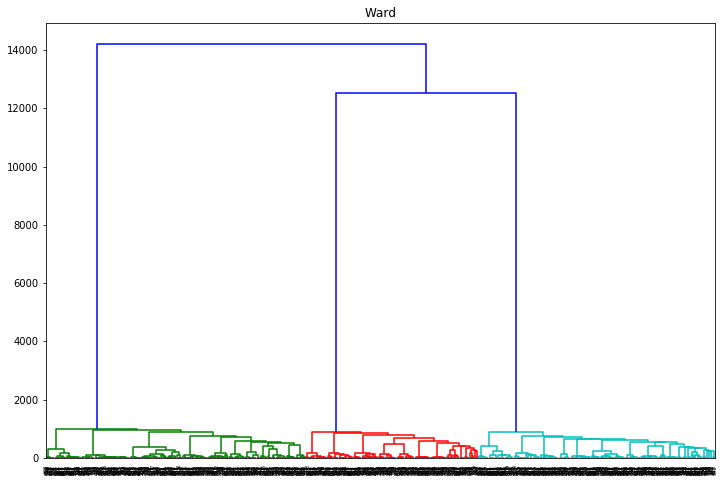

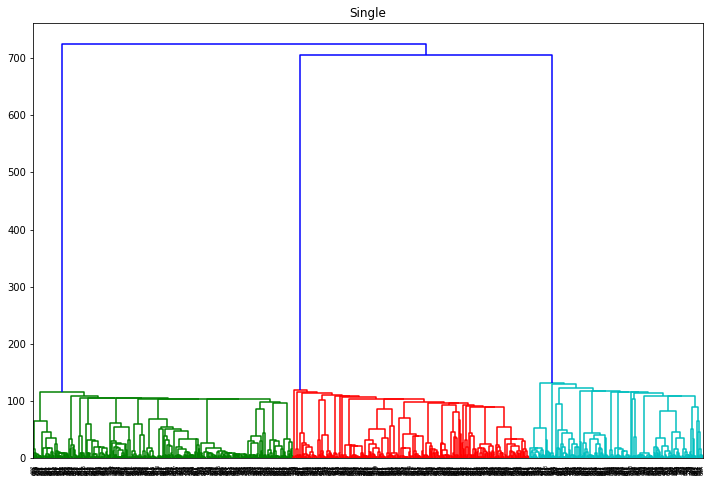

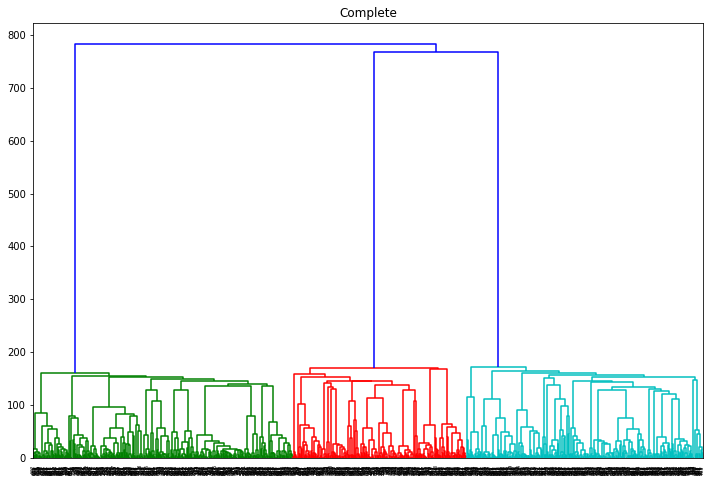

In [4]:
# Assign our genetic code
code = ['A', 'T', 'C', 'G']

# Convert list of integers to corresponding letters 
def to_code(a):
  return [code[i] for i in a]

"""Distance between two DNA strands. Returns the number of characters that are different
in corresponding positions in the two sequences."""
def dist(a, b):
  return sum(i != j for i, j in zip(a, b))

"""Function to generate offspring. In this example only one parent is required. 
For each character, we call function `maybe_modify`, which may or may not modify
the character."""
def generate_offspring(parent):
  return[maybe_modify(c) for c in parent]

"""Function that will modify a character (aka mutate), which approximately a 0.001 prob"""
def maybe_modify(c):
  if np.random.random() < 0.001:
    return np.random.choice(code)
  return c

# Create 3 distinct, original ancestors, each with sequence length of 1000. Consists 
# of digits ranging from 0 to 3. Call `to_code` to convert into ATCG
p1 = to_code(np.random.randint(4, size=1000))
p2 = to_code(np.random.randint(4, size=1000))
p3 = to_code(np.random.randint(4, size=1000))

"""Loop to generate our offspring"""
num_generations = 99                     # 100 generations including original
max_offspring_per_generation = 1000      # Set to 1000 to reduce computation time
current_generation = [p1, p2, p3]        # Set current_gen to be list of current parents

for i in range(num_generations): # Loop through all generations
  next_generation = []
  for parent in current_generation: # Loop through each parent
    # Each parent will have between 1 and 3 children
    num_offspring = np.random.randint(3) + 1 
    
    # Generate offspring
    for _ in range(num_offspring):
      child = generate_offspring(parent)
      next_generation.append(child)
      
  current_generation = next_generation
  
  # Limit the number of offspring
  random.shuffle(current_generation)
  current_generation = current_generation[:max_offspring_per_generation]
  print("Finished creating generation %d / %d, size = %d" % (i + 2, num_generations + 1, len(current_generation)))

"""Hierarchical Clustering section
Create a distance matrix. Note, could also use scipy's pdist for this, but NOT
sklearn's pariwise_distance function since it is not symmetrical. Recall, the linkage
function can accept 2 different types of arguments. The first is just the raw data. If
it receives the raw data, it will calculate the distances between each data point 
internally, using a distance metric like euclidean distance. However, since our data 
is a list of strings, we need to have a special distance function, since the linkage
function cannot handle it. So we need to use the second type of input for the linkage 
function, which is a list of distances order in a specific way. In particular, we would
like to create a distance matrix, and in this matrix, the entry i,j is the distane 
between each data point i, and data point j. So, it will be an NxN matrix. Note, we can
save time by only calculating half of the matrix. This is because the distances are 
symetric. The distance between data point i and data point j, is the same between
j and i. We also don't need to calculate any of the distances along the diagonal, 
since two equivalent sequences should yield a distance of zero. Once we have done this 
we can call the square_form function which takes in a distance matrix, and returns 
a flat array of distances."""
N = len(current_generation)
dist_matrix = np.zeros((N, N))
for i in range(N):
  for j in range(N):
    if i == j:
      continue
    elif j > i:
      a = current_generation[i]
      b = current_generation[j]
      dist_matrix[i, j] = dist(a, b)
    else:
      dist_matrix[i, j] = dist_matrix[j, i]

dist_array = ssd.squareform(dist_matrix)

Z = linkage(dist_array, 'ward')
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Ward")
dendrogram(Z)
plt.show()

Z = linkage(dist_array, 'single')
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Single")
dendrogram(Z)
plt.show()

Z = linkage(dist_array, 'complete')
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Complete")
dendrogram(Z)
plt.show()

---

<br>
# 4. Hilary Clinton vs. Donald Trump Tweets
We are now going to go through another interesting example: tweets from both Hilary Clinton and Donald Trump during the 2016 presedential election. So, what are we going to try and do on these tweets? Well, remember that hierarchical clustering works on distances, so how exactly will we calculate the distance between 2 tweets. 

One way is to use **TF-IDF**. We will utilize scitkit learn in order to implement TF-IDF. 

### 4.1 Tweet Distance
We can convert each tweet into a vector, and after that calculating the distances between vectors is trivial. We will define our vector space such that each dimension represents a different word. The value of each vector element is the number of times that word appeared in a specific tweet. 

For example, let's say we wanted to represent the sentence: "The dog chased the cat." We can convert these into word counts:

|Word|Count|
|---|---|
|the|2|
|dog|1|
|chased|1|
|cat|1|

If we then decided to organize our words in alphabetical order, our vector would be: 
$$(cat, chased, dog, the) \rightarrow (1, 1, 1, 2)$$

### 4.2 Problem with raw word counts
However, there is a problem using raw word counts like this. In most documents, some words show up a disproportionate number of times, and most often these words are not important. For example: `the`, `a`, `in`, `this` are equally likely to be seen in a document regarding physics or biology. Whereas `DNA` and `tissue` are features that would correlate to a biology document, and `mass`, `gravity` would correspond to a physics document. 

So, we have two problems:
1. Irrelevant words show up a lot more than relevant words
2. Irrelavent words show up in all documents (samples), hence they don't help us distinguish between the two classes

### 4.3 Term Frequency - Inverse Document Frequency (TF - IDF)
* **Term frequency**: this is the raw word counts that we saw earlier
* **Inverse Document Frequency**: 1 / (# of documents a word appears in) 

So, if a word shows up in many documents, the inverse document frequency will lower that words feature value. By using **TF-IDF** a word becomes "interesting" (has a high feature value) when it shows up often in just a few documents.

### 4.4 How to use TF-IDF
So, how do we convert our tweets into a matrix of numbers? We can use a class in scikit learn called `sklearn.feature_extraction.text.TfidfVectorizer`

Similar to unsupervised models, it has a `fit` function and a `transform` function, or it can do both at the same time with the `fit_transform` function.

```
fit(text)
transform(text)
fit_transform(text)
# text = an array of documents (or an array of tweets in our case)
# returns an NxD matrix (N = # documents, D = vocabulary size)
```

All we need to do is pass in an array, where each element is a text document-or in our case a tweet. So, it will be very easy for us to convert our data into a matrix with just this one function call. Once we have done that we can do our hierarchical clustering. 

What we hope to find when this is all done is 2 distinct clusters. 1 representing tweets from donald trump, and 1 representing tweets from hilary clinton. Of course, this is unsupervised learning, so this is not what we would necesarily find. The result could be anything. 

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.feature_extraction.text import TfidfVectorizer

proportion @realDonaldTrump 0.495
proportion @HillaryClinton 0.504


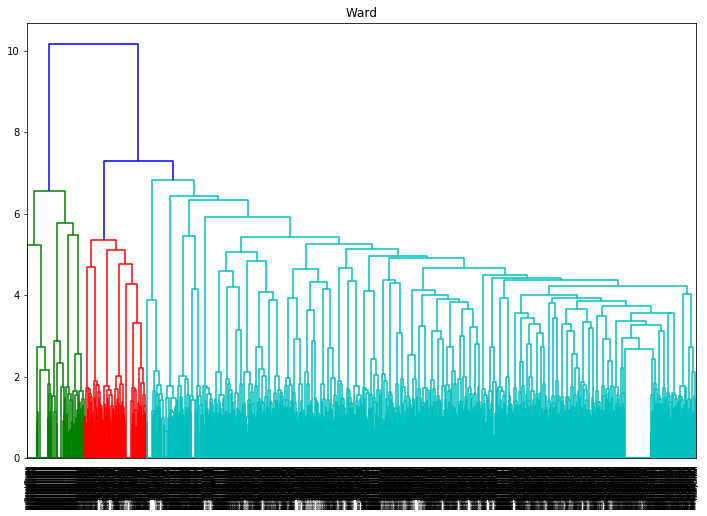

Values in C: {1, 2}
purity: 0.5745
purity of @realDonaldTrump cluster: 0.9069767441860465
purity of @HillaryClinton cluster: 0.5432166301969366
classifier score: 0.946772191185599

Top 10 'Donald cluster' words:
thank
trump2016
makeamericagreatagain
new
join
me
will
today
last
america

Top 10 'Hillary cluster' words:
trump
hillary
we
will
our
donald
he
not
great
all


In [11]:
stopwords = [
  'the',
  'about',
  'an',
  'and',
  'are',
  'at',
  'be',
  'can',
  'for',
  'from',
  'if',
  'in',
  'is',
  'it',
  'of',
  'on',
  'or',
  'that',
  'this',
  'to',
  'you',
  'your',
  'with',
]

# Regex to find urls and twitter usernames within a string. Want to remove URLs
url_finder = re.compile(r"(?:\@|https?\://)\S+")


def filter_tweet(s):
  "Downcases each tweet, replaces all URLs and usernames with blanks"
  s = s.lower()
  s = url_finder.sub("", s)
  return s

# Load in our data, convert text column in to list, filter each tweet
df = pd.read_csv("../../../data/tweets/tweets.csv")
text = df.text.tolist()
text = [filter_tweet(s) for s in text]

# Create an instance of TfidfVectorizer, transform text into a data matrix. max_features limits vocab size to be 
# most frequent 100 words. fit_transform returns a scipy sparse matrix, which our subsequent code can't handle. So
# we have to call todense in order to convert it into a more usable format. The reason that Tfidf does that is 
# because most of the values in the matrix end up being 0, so representing it as a sparse matrix is more efficient
tfidf = TfidfVectorizer(max_features=100, stop_words=stopwords)
X = tfidf.fit_transform(text).todense()

# Because we have to calculate pairwise distances in order to do hierarchical clustering, which is O(N^2), we want
# to subsample the data. Otherwise, the distance calculations will be extremely slow. We can also assign labels.
N = X.shape[0]
idx = np.random.choice(N, size=2000, replace=False)
x = X[idx]
labels = df.handle[idx].tolist()

# Next, we want to confirm that Clinton and Trumps tweets are equally represented in our subsample, so we print 
# out the proportion of each. They should each be about 50% 
pTrump = sum(1.0 if e == 'realDonaldTrump' else 0.0 for e in labels) / len(labels)
print("proportion @realDonaldTrump %.3f" % pTrump)
print("proportion @HillaryClinton %.3f" % (1 - pTrump))

# Next, we use scipys pdist function to calculate the pairwise distances. Note, we did this manually before, and 
# originally we did not do it at all
dist_array = pdist(x)

# Calculate Hierarchy
Z = linkage(dist_array, 'ward')
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Ward")
dendrogram(Z, labels=labels)
plt.show()

# In order to calculate purity we need to caculate the cluster assignments. Note, scipy returns cluster 
# assignments from 1 up to k, rather from the customary 0 to k - 1. So, when we assign the true labels we will 
# need to use 1 and 2 rather than 0 and 1. 
Y = np.array([1 if e == 'realDonaldTrump' else 2 for e in labels])

# Call fcluster function to get cluster assignments. Threshold of 9, based on dendrogram from above.  
C = fcluster(Z, 9, criterion='distance') # returns 1, 2,...,K
categories = set(C)
print("Values in C:", categories) # sanity check: should be {1, 2}

# Calculate the purity of our clusters 
def purity(true_labels, cluster_assignments, categories):
  # maximum purity is 1, higher is better
  N = len(true_labels)

  total = 0.0
  for k in categories:
    max_intersection = 0
    for j in categories:
      intersection = ((cluster_assignments == k) & (true_labels == j)).sum()
      if intersection > max_intersection:
        max_intersection = intersection
    total += max_intersection
  return total / N

print("purity:", purity(Y, C, categories))

# We know the smaller cluster is the trump cluster. Important note: we call it the trump cluster from observing 
# AFTER the fact that most tweets in this cluster are by trump we do NOT use those labels to create the cluster
# We create the clusters using a distance-based algorithm which knows nothing about the labels, just the tf-idf 
# scores. It just so happens that most of the tweets in one of the clusters is by trump, and that this cluster is 
# very small
if (C == 1).sum() < (C == 2).sum():
  d = 1
  h = 2
else:
  d = 2
  h = 1
  
# Set the number of actual donald tweets to be the size to be the interseection of cluster d and label 1
actually_donald = ((C == d) & (Y == 1)).sum()
donald_cluster_size = (C == d).sum()
print("purity of @realDonaldTrump cluster:", float(actually_donald) / donald_cluster_size)

# Set the number of actual hillary tweets to be the size to be the intersection of cluster h and label 2
# This cluster is not as pure as the trump cluster. Donald trump had a very simple and very repetitive message,
# like a meme. 
actually_hillary = ((C == h) & (Y == 2)).sum()
hillary_cluster_size = (C == h).sum()
print("purity of @HillaryClinton cluster:", float(actually_hillary) / hillary_cluster_size)

# See how a random forest classifier would perform on this data set. Note, classification is always easier 
# because we can use the labels. So, just like MNIST, we get above 90% with a stock classifier, but the purity
# is only ~50%. 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X, df.handle)
print("classifier score:", rf.score(X, df.handle))

# Finally, we want to know what words have the highest tf-idf in cluster 1 and 2. Call vocabulary_, this gives 
# us a dictionary mapping from word to index. 
w2i = tfidf.vocabulary_

# Next, calculate the average vector in the donald trump cluster. Note, we must convert this into an array and 
# flatten it in order to index it more intuitively. This is because tfidf todense function returns a matrix, 
# which always must be a 2d object. We can then sort these words by the tfidf score, in descending order.
d_avg = np.array(x[C == d].mean(axis=0)).flatten()
d_sorted = sorted(w2i.keys(), key=lambda w: -d_avg[w2i[w]])
print("\nTop 10 'Donald cluster' words:")
print("\n".join(d_sorted[:10]))

h_avg = np.array(x[C == h].mean(axis=0)).flatten()
h_sorted = sorted(w2i.keys(), key=lambda w: -h_avg[w2i[w]])
print("\nTop 10 'Hillary cluster' words:")
print("\n".join(h_sorted[:10]))